# Глава 8. Усиление сигнала и игнорирование шума

## Трёхслойная сеть для классификации набора MNIST

In [2]:
import sys
import numpy as np
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

images, labels = (x_train[0:1000].reshape(1000, 28*28) / 255, y_train[0:1000])
one_hot_labels = np.zeros((len(labels), 10))

for i, l in enumerate(labels):
    one_hot_labels[i][l] = 1
labels = one_hot_labels

test_images = x_test.reshape(len(x_test), 28*28) /255
test_labels = np.zeros((len(y_test), 10))
for i, l in enumerate(y_test):
    test_labels[i][l] = 1

np.random.seed(1)
relu = lambda x: (x>=0) * x
relu2deriv = lambda x: x>=0

alpha = 0.005
iterations = 350
hidden_size = 40
pixels_per_image = 784
num_labels = 10

weights_0_1 = 0.2 * np.random.random((pixels_per_image, hidden_size)) - 0.1
weights_1_2 = 0.2 * np.random.random((hidden_size, num_labels)) - 0.1

errors = []
corrects = []

for j in range(iterations):
    error, correct_cnt = 0.0, 0
    for i in range(len(images)):
        layer_0 = images[i:i+1]
        layer_1 = relu(np.dot(layer_0, weights_0_1))
        layer_2 = np.dot(layer_1, weights_1_2)
        error += np.sum((labels[i:i+1] - layer_2) ** 2)
        correct_cnt += int(np.argmax(layer_2) == np.argmax(labels[i:i+1]))

        layer_2_delta = labels[i:i+1] - layer_2
        layer_1_delta = layer_2_delta.dot(weights_1_2.T) * relu2deriv(layer_1)

        weights_1_2 += alpha * layer_1.T.dot(layer_2_delta)
        weights_0_1 += alpha * layer_0.T.dot(layer_1_delta)
    
    errors.append(error/float(len(images)))
    corrects.append(correct_cnt/float(len(images)))

    sys.stdout.write(f"\rIter: {j}\tError: {error/float(len(images))}\tCorrect: {correct_cnt/float(len(images))}")

Iter: 349	Error: 0.1088197985406658	Correct: 1.0099

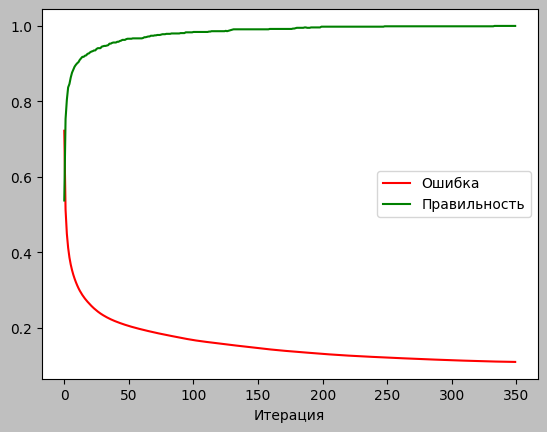

In [6]:
import matplotlib.pyplot as plt

plt.style.use('grayscale')

plt.plot(errors, color="r", label="Ошибка")
plt.plot(corrects, color="g", label="Правильность")
plt.legend()
plt.xlabel('Итерация')

plt.show()

## Переобучение

In [4]:
if(j % 10 == 0 or j == iterations-1):
    test_error, test_correct_cnt = (0.0, 0)

    for i in range(len(test_images)):

        layer_0 = test_images[i:i+1]
        layer_1 = relu(np.dot(layer_0,weights_0_1))
        layer_2 = np.dot(layer_1,weights_1_2)

        test_error += np.sum((test_labels[i:i+1] - layer_2) ** 2)
        test_correct_cnt += int(np.argmax(layer_2) == \
                                        np.argmax(test_labels[i:i+1]))
    sys.stdout.write("Test-Err: " + str(test_error/float(len(test_images)))[0:5] +\
                     "\tTest-Acc: " + str(test_correct_cnt/float(len(test_images))) + "\n")
    print()

Test-Err: 0.653	Test-Acc: 0.7073



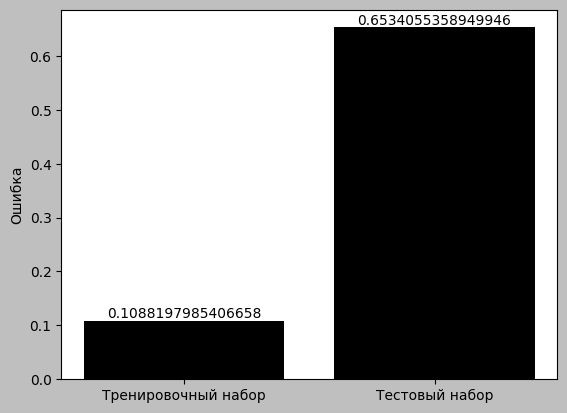

In [5]:
import matplotlib.pyplot as plt

categories = ['Тренировочный набор', 'Тестовый набор']
values = [error/float(len(images)), test_error/float(len(test_images))]

bars = plt.bar(categories, values)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, yval, ha='center', va='bottom')

plt.ylabel('Ошибка')

plt.show()

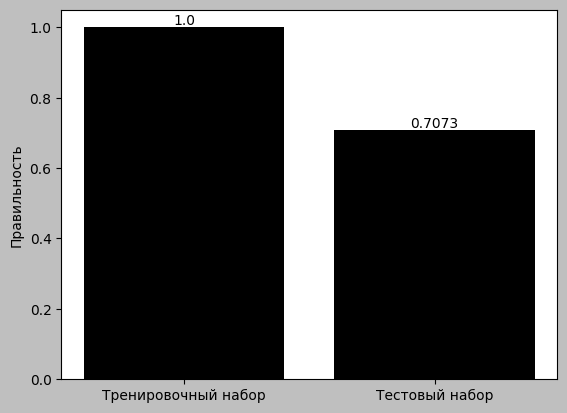

In [7]:
import matplotlib.pyplot as plt

categories = ['Тренировочный набор', 'Тестовый набор']
values = [correct_cnt/float(len(images)), test_correct_cnt/float(len(test_images))]

bars = plt.bar(categories, values)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, yval, ha='center', va='bottom')

plt.ylabel('Правильность')

plt.show()

## Прореживание

In [8]:
import sys
import numpy as np
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

images, labels = (x_train[0:1000].reshape(1000, 28*28) / 255, y_train[0:1000])
one_hot_labels = np.zeros((len(labels), 10))

for i, l in enumerate(labels):
    one_hot_labels[i][l] = 1
labels = one_hot_labels

test_images = x_test.reshape(len(x_test), 28*28) /255
test_labels = np.zeros((len(y_test), 10))
for i, l in enumerate(y_test):
    test_labels[i][l] = 1

np.random.seed(1)
relu = lambda x: (x>=0) * x
relu2deriv = lambda x: x>=0

alpha = 0.005
iterations = 350
hidden_size = 40
pixels_per_image = 784
num_labels = 10

weights_0_1 = 0.2 * np.random.random((pixels_per_image, hidden_size)) - 0.1
weights_1_2 = 0.2 * np.random.random((hidden_size, num_labels)) - 0.1

errors = []
corrects = []

for j in range(iterations):
    error, correct_cnt = 0.0, 0
    for i in range(len(images)):
        layer_0 = images[i:i+1]
        dropout_mask = np.random.randint(2, size=layer_1.shape)
        layer_1 = relu(np.dot(layer_0, weights_0_1))
        layer_1 *= dropout_mask * 2
        layer_2 = np.dot(layer_1, weights_1_2)
        error += np.sum((labels[i:i+1] - layer_2) ** 2)
        correct_cnt += int(np.argmax(layer_2) == np.argmax(labels[i:i+1]))

        layer_2_delta = labels[i:i+1] - layer_2
        layer_1_delta = layer_2_delta.dot(weights_1_2.T) * relu2deriv(layer_1)
        layer_1_delta *= dropout_mask

        weights_1_2 += alpha * layer_1.T.dot(layer_2_delta)
        weights_0_1 += alpha * layer_0.T.dot(layer_1_delta)
    
    errors.append(error/float(len(images)))
    corrects.append(correct_cnt/float(len(images)))

    sys.stdout.write(f"\rIter: {j}\tError: {error/float(len(images))}\tCorrect: {correct_cnt/float(len(images))}")

Iter: 349	Error: 0.41883114675707206	Correct: 0.802

In [9]:
if(j % 10 == 0 or j == iterations-1):
    test_error, test_correct_cnt = (0.0, 0)

    for i in range(len(test_images)):

        layer_0 = test_images[i:i+1]
        layer_1 = relu(np.dot(layer_0,weights_0_1))
        layer_2 = np.dot(layer_1,weights_1_2)

        test_error += np.sum((test_labels[i:i+1] - layer_2) ** 2)
        test_correct_cnt += int(np.argmax(layer_2) == \
                                        np.argmax(test_labels[i:i+1]))
    sys.stdout.write("Test-Err: " + str(test_error/float(len(test_images)))[0:5] +\
                     "\tTest-Acc: " + str(test_correct_cnt/float(len(test_images))) + "\n")
    print()

Test-Err: 0.421	Test-Acc: 0.8078

